<a href="https://colab.research.google.com/github/SanjulaMathur/Internship--Exploratory-Data-Analysis-on-Car-features-and-msrp-dataset./blob/master/Exploratory_Data_Analysis_of_Car_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:** Exploratory Data Analysis of Car Features!


#**Context**
As a data scientist, the majority of your time will be spent on data pre-processing i.e.
making sure you have the right data in the right format. Once this is done, you get a
sense of your dataset through applying some descriptive statistics and then, you move
on to the exploration stage wherein you plot various graphs and mine the hidden
insights. In this project, you as a data scientist are expected to perform Exploratory data
analysis on how the different features of a car and its price are related. The data comes
from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car
models, sold in the USA between 1990 and 2017, with the market price (new or used)
and some features.


#**Objective**
The objective of the project is to do data pre-processing and exploratory data analysis
of the dataset.

**[Click here for the dataset.](https://www.kaggle.com/CooperUnion/cardataset)**

#1.Importing the dataset and the necessary libraries, checking datatype, statistical summary, shape, null values etc.

In [54]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#files.upload returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data which were uploaded.
from google.colab import files 
uploaded= files.upload()

Saving data.csv to data (1).csv


In [198]:
#Way to load csv file into google colab.
import io
data = io.BytesIO(uploaded['data.csv'])

In [199]:
#reading the csv file onto the google colab
data= pd.read_csv(data)

In [200]:
#reading the dataset
data.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


##1.1 Checking the datatype of each column

In [201]:
#checking the data type of each column of our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

##1.2 Descriptive or summary statistics in python
 – pandas, can be obtained by using describe function – describe(). Describe Function gives the mean, std and IQR values.**
This function excludes the character columns and gives summary statistics of numeric columns.We need to add a variable named include=’all’ to get the summary statistics or descriptive statistics of both numeric and character column.


In [202]:
#The following function gives the statistical  measures of the numerical values.
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


We can now check the shape of our data set, which means checking the number of rows and columns containing all the information.

In [203]:
#The result of the following function would be in the form of (number of rows * number of columns)
data.shape

(11914, 16)

# 2.Dropping irrelevant columns
Dropping columns engine fuel type, market category, number of doors as these are irrelevant.

In [204]:
#Dropping irrelevant columns.
data.drop(['Engine Fuel Type', 'Number of Doors','Market Category'], axis=1, inplace=True)
data.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


#3.Renaming the columns

In [205]:
#Renaming the columns.
data.columns= ['Make', 'Model','Year', 'HP', 'Cylinders','Transmission','Drive Mode', 'Vehicle Size',
       'Vehicle Style', 'MPG-H', 'MPG-C','Popularity', 'Price']
data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


#4.Dropping Duplicate entries.
In Data Science, we usually come accross some duplicate entries, in the rows. This means two rows having the exact same values for each column. This could be eliminated through the use of pandas.dataframe.duplicated() function.

In [206]:
#Finding the duplicate entries.
duplicateDFRow = data[data.duplicated()]
duplicateDFRow

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,95.0,4.0,MANUAL,four wheel drive,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,302.0,4.0,AUTOMATIC,all wheel drive,Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,240.0,4.0,AUTOMATIC,front wheel drive,Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,252.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr SUV,22,15,481,29149


Here all the duplicate rows except their first occurrence are returned because the default value of keep argument was "first".If we want to select all the duplicate rows except their last occurrence, then we need to pass a keep argument as "last" Pandas drop_duplicates() method helps in removing duplicates from the data frame.

In [207]:
#Removing duplicates from the data frame.
data.drop_duplicates(keep ='first', inplace = True)
#Checking the shape of the dataframe to check whether the duplicates are removed or not.
data.shape

(11122, 13)

##4.1Dropping the missing values
##**Working with Null Values:**
Missing Data can occur when no information is provided for one or more items or for a whole unit. Missing Data is a very big problem in real life scenario. Missing Data can also refer to as NA(Not Available) values.In order to check missing values in Pandas DataFrame, we use a function isnull() and notnull(). Both function help in checking whether a value is NaN or not. These function can also be used in Pandas Series in order to find null values in a series.

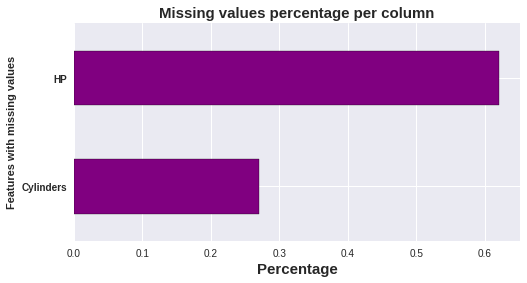

In [208]:
#The following graph gives the percentage of null values , in each column. 
plt.style.use('seaborn')
allna = (data.isnull().sum() / len(data))*100
allna = allna.drop(allna[allna == 0].index).sort_values()
plt.figure(figsize=(8, 4))
allna.plot.barh(color=('purple'), edgecolor='black')
plt.title('Missing values percentage per column', fontsize=15, weight='bold' )
plt.xlabel('Percentage', weight='bold', size=15)
plt.ylabel('Features with missing values', weight='bold')
plt.yticks(weight='bold')
plt.show()

In [209]:
#The following function gives the number of null values, in each column. 
data.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

After this, we can either drop the rows or columns having null values, or we can fill the missing values with the appropriate values.
We can see the columns, "HP" and "Cylinders", having null values less than 1% of the entire dataset, so we can fill them by ffill method or backword fill method, but we will just drop those values, in order to be more precise and accurate with our results.

In [210]:
#Dropping the missing values.
data=data.dropna()
data.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [211]:
#Checking the number of null values.
data.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

**We have successfully removed the null values from our dataset. We can move further with our exploratory data analysis.**

#5.Detecting Outliers.


An outlier is an observation that is unlike the other observations.Outliers are the values in dataset which standouts from the rest of the data. It is rare, or distinct, or does not fit in some way. BOX-PLOTS give out the information on the variability or dispersion of the data.A boxplot is a graph that gives you a good indication of how the values in the data are spread out.

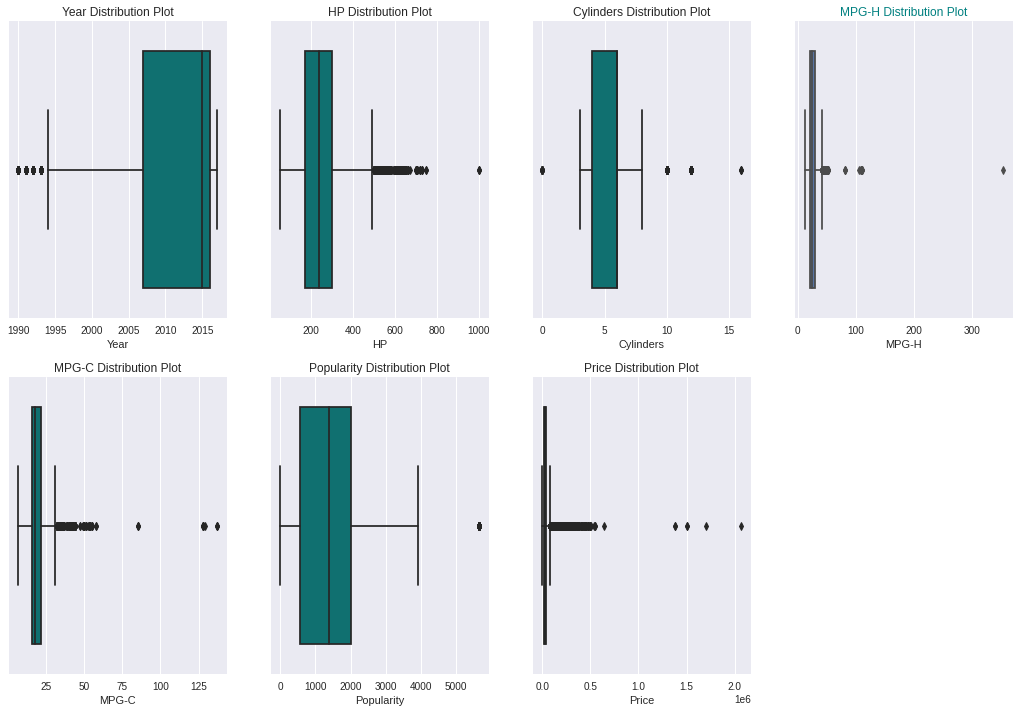

In [212]:
#Importing the seaborn library.
import seaborn as sns
#Plotting the boxplots of each continuous variable to find outliers.
plt.style.use('seaborn')
plt.figure(figsize=(18,12))

plt.subplot(2,4,1)
plt.title("Year Distribution Plot")
sns.boxplot(x=data['Year'], color='teal')

plt.subplot(2,4,2)
plt.title("HP Distribution Plot")
sns.boxplot(x=data['HP'], color='teal')

plt.subplot(2,4,3)
plt.title("Cylinders Distribution Plot")
sns.boxplot(x=data['Cylinders'], color='teal')

plt.subplot(2,4,4)
plt.title("MPG-H Distribution Plot", color='teal')
sns.boxplot(x=data['MPG-H'])

plt.subplot(2,4,5)
plt.title("MPG-C Distribution Plot")
sns.boxplot(x=data['MPG-C'], color='teal')

plt.subplot(2,4,6)
plt.title("Popularity Distribution Plot")
sns.boxplot(x=data['Popularity'], color='teal')

plt.subplot(2,4,7)
plt.title("Price Distribution Plot")
sns.boxplot(x=data['Price'], color='teal')

plt.show()

****IQR Method of Outlier Detection****


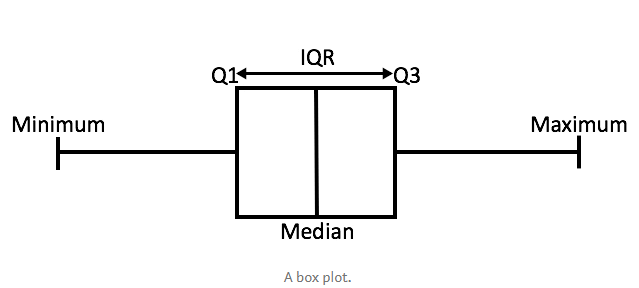

A box plot tells us, more or less, about the distribution of the data. It gives a sense of how much the data is actually spread about, what’s its range, and about its skewness. As you might have noticed in the figure, that a box plot enables us to draw inference from it for an ordered data, i.e., it tells us about the various metrics of a data arranged in ascending order.
In the above figure,
minimum is the minimum value in the dataset,
and maximum is the maximum value in the dataset.
So the difference between the two tells us about the range of dataset.
The median is the median (or centre point), also called second quartile, of the data (resulting from the fact that the data is ordered).
Q1 is the first quartile of the data, i.e., to say 25% of the data lies between minimum and Q1.
Q3 is the third quartile of the data, i.e., to say 75% of the data lies between minimum and Q3.
The difference between Q3 and Q1 is called the Inter-Quartile Range or IQR.

In [213]:
#Calculating the IQR range, for each column.
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
#Printing the Q1 and Q3 values.
IQR

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64

In [214]:
#Removing the outliers from the data.
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(8546, 13)

#6.The car brands that are represented the most.

[]

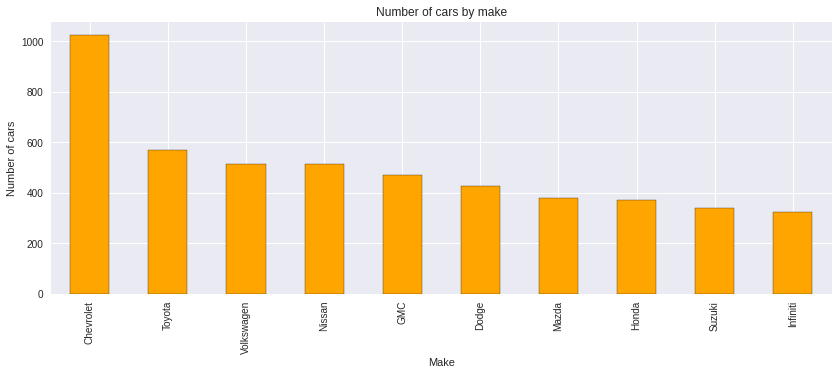

In [215]:
#Bar Plot to find the total number of cars sold, for each brand.
data.Make.value_counts().nlargest(10).plot(kind='bar', figsize=(14,5), color='orange', edgecolor='black')
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');
plt.plot()

**The  car brands that are the most represented in the dataset.**


In [216]:
#Returning the counts of each Car brand according to their respective number of occurences.
brands=data['Make'].value_counts()
brands[:10]

Chevrolet     1027
Toyota         569
Volkswagen     515
Nissan         513
GMC            469
Dodge          425
Mazda          378
Honda          373
Suzuki         339
Infiniti       322
Name: Make, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


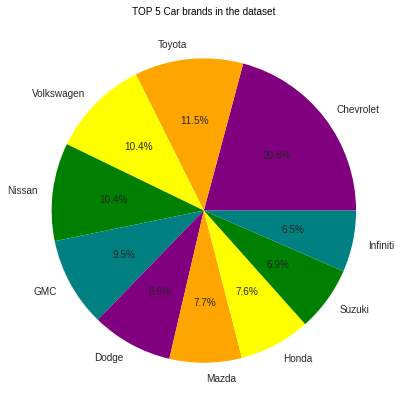

In [217]:
#Plotting a pie chart representing the distribution among the top 10 selling brands.
carr=data['Make'].value_counts().head(5).to_frame()
m= carr.style.background_gradient(cmap='Blues')
colors=['purple','orange','yellow','green','teal']
labels= ['Chevrolet','Toyota','Volkswagen','Nissan', 'GMC','Dodge','Mazda','Honda','Suzuki','Infiniti']
sizes= ['1027','569','515','513','469','425','378','373','339','322']
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
values=data['Make'].value_counts().head(10).to_frame()

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=None,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('TOP 5 Car brands in the dataset',color='black',fontsize=10)
plt.show()

Hence, we can conclude that "Chevrolet" brand is mostly represented in the dataset, followed by "Toyota","Volkswagen","Nissan", "GMC" and so on and so forth

In [218]:
#Checking the average price of each of the top ten car brands.
average = data[['Make','Price']].loc[(data['Make'] == 'Chevrolet')|(data['Make'] == 'Ford')|
               (data['Make'] == 'Volkswagen')|(data['Make'] == 'Toyota')|(data['Make'] == 'Dodge')|
               (data['Make'] == 'Nissan')|(data['Make'] == 'GMC')|(data['Make'] == 'Honda')|
               (data['Make'] == 'Mazda')].groupby('Make').mean()
#Printing the average price of top-10 brands.
average

,Price
Make,
Chevrolet,28142.855891
Dodge,26076.722353
GMC,33261.400853
Honda,27381.364611
Mazda,20495.820106
Nissan,28352.543860
Toyota,27769.421793
Volkswagen,29032.817476


#7.Correlation Matrix
Variables within a dataset can be related for lots of reasons.

For example:

One variable could cause or depend on the values of another variable.
One variable could be lightly associated with another variable.
Two variables could depend on a third unknown variable.
It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

Positive Correlation: both variables change in the same direction.
Neutral Correlation: No relationship in the change of the variables.
Negative Correlation: variables change in opposite directions.

In [219]:
#Creating a correlation matrix.
corr_matrix=data.corr()
#Printing the matrix.
corr_matrix

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


We can use the seaborn and matplotlib packages in order to get a visual representation of the correlation matrix.

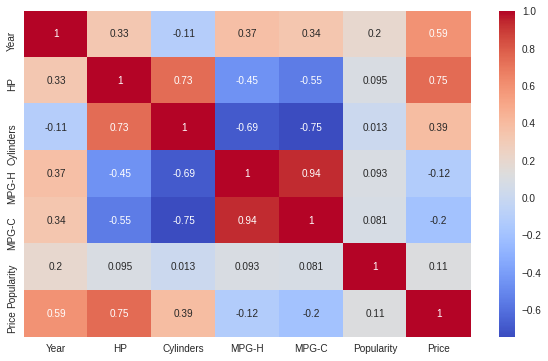

In [220]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**We can derive the following insights from the correlation matrix which is illustrated below:**


*   HP is highly correlated with Cylinders and Price, and negatively correlated with MPG-H and MPG-C.(This means that Horse Power is the one of the major contributing factors of the price of the car,)
*   Cylinders is in a moderate to high correlation with Price and negatively correlated with MPG-H and MPG-C.(This means the lesser number of cylinders, higher is the MPG-C and MPG-H.)
*   MPG-H and MPG-C are highly correlated among themselves.






#8.Plotting graphs of various columns for better exploratory data analysis.

**Plotting each continuous variable/column of the dataset with then Price column to see what is the correlation between them.**
We will do this task of visualization with the help of Scatter Plot. Scatter plot is a graph in which the values of two variables are plotted along two axes. It is a most basic type of plot that helps you visualize the relationship between two variables.

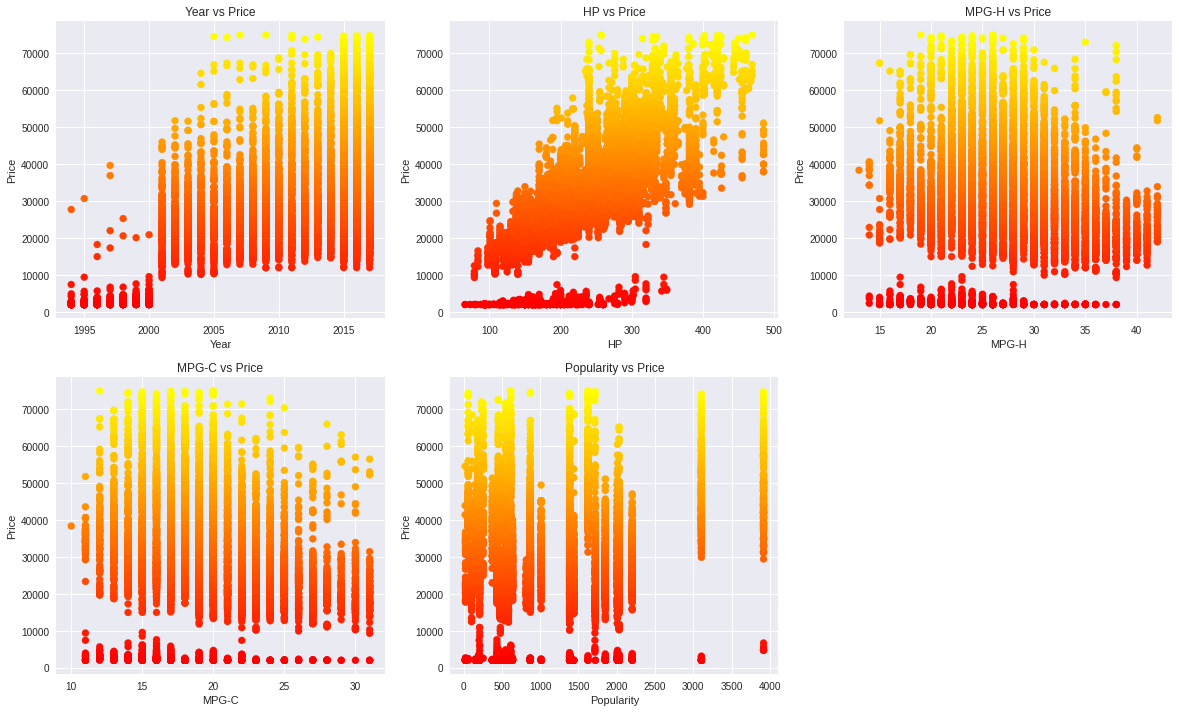

In [221]:
#Plotting the boxplots of each continuous variable to find if any outlier is left.
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
plt.title("Year vs Price")
plt.scatter(data["Year"], data["Price"],c=data['Price'], cmap='autumn')
plt.xlabel("Year")
plt.ylabel("Price")

plt.subplot(2,3,2)
plt.title("HP vs Price")
plt.scatter(data["HP"], data["Price"],c=data['Price'], cmap='autumn')
plt.xlabel("HP")
plt.ylabel("Price")

plt.subplot(2,3,3)
plt.title("MPG-H vs Price")
plt.scatter(data["MPG-H"], data["Price"],c=data['Price'], cmap='autumn')
plt.xlabel("MPG-H")
plt.ylabel("Price")

plt.subplot(2,3,4)
plt.title("MPG-C vs Price")
plt.scatter(data["MPG-C"], data["Price"],c=data['Price'], cmap='autumn')
plt.xlabel("MPG-C")
plt.ylabel("Price")

plt.subplot(2,3,5)
plt.title("Popularity vs Price")
plt.scatter(data["Popularity"], data["Price"],c=data['Price'], cmap='autumn')
plt.xlabel("Popularity")
plt.ylabel("Price")

plt.show()

These subplots show that HP is the most correlated feature with price. 

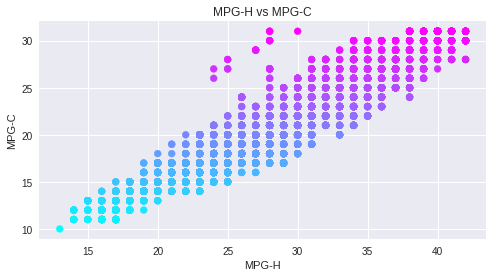

In [222]:
#plotting the scatter plot between MPG-H and MPG-C
plt.figure(figsize=(8,4))
plt.title("MPG-H vs MPG-C")
plt.scatter(data["MPG-H"], data['MPG-C'],c=data['MPG-C'], cmap='cool')
plt.xlabel("MPG-H")
plt.ylabel("MPG-C")
plt.show()

This graph shows how MPG-H and MPG-C are strongly correlated, as we already observed its high correlation value in the correlation matrix.

Let's analyize the relation between Engine Cylinders, Engine HP, Price.

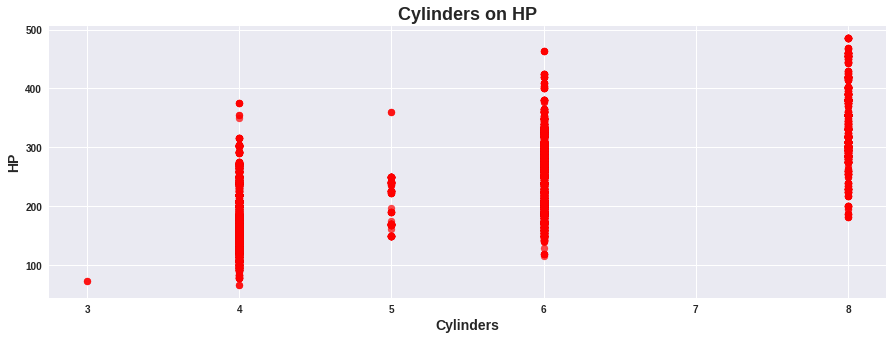

In [223]:
#Correlation between Cylinders and HP.
plt.figure(figsize=(15,5))
plt.scatter(x=data['Cylinders'], y=data['HP'], color='red', alpha=0.7)
plt.title('Cylinders on HP', weight='bold', fontsize=18)
plt.xlabel('Cylinders', weight='bold',fontsize=14)
plt.ylabel('HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

The above graph proves that Cylinders is positively correlated with HP. The cars having high HP values are having more cylinders in general.

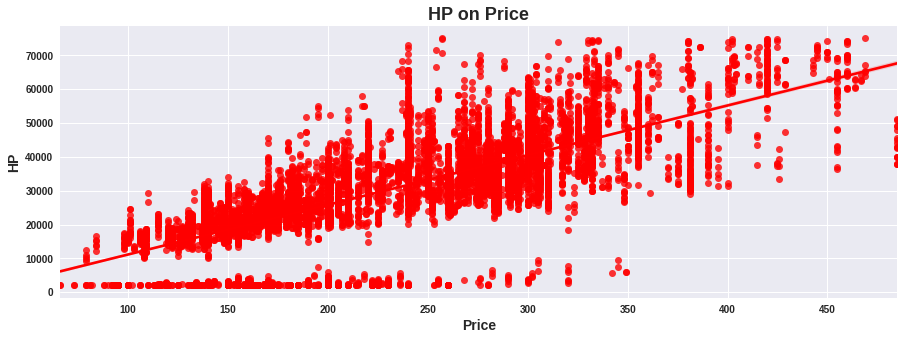

In [224]:
#Correlation between HP and Price of car.
plt.figure(figsize=(15,5))
sns.regplot(x=data['HP'], y=data['Price'], color='red')
plt.title('HP on Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

HP and Price are highly correlated. Thus more is the HP value, the more is the price of the car.

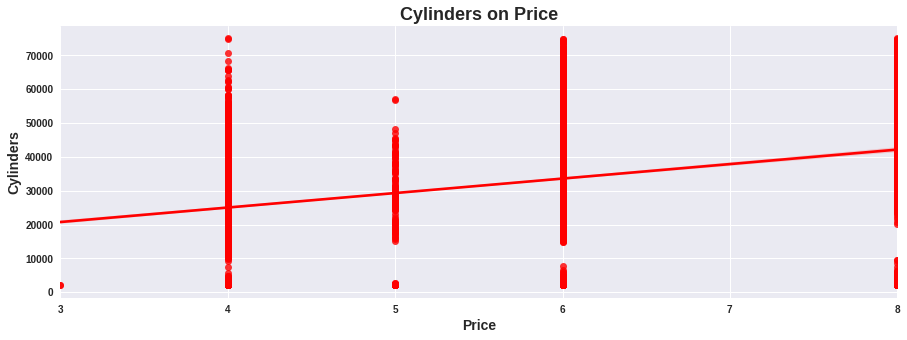

In [225]:
#Correlation between Cylinders and Price of car.
plt.figure(figsize=(15,5))
sns.regplot(x=data['Cylinders'], y=data['Price'], color='red')
plt.title('Cylinders on Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('Cylinders', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

Cylinders and Price are somewhat correlated with each other, though not too much as we can see in the graph above.

Inference : An engine with more cylinders produces more power, and more power means a high Price.

**Correlation between MPG and Engine HP** 

[]

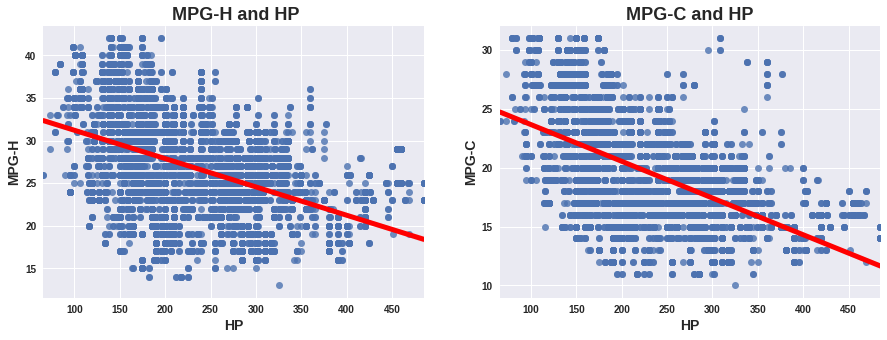

In [226]:
#Correlation between MPG-H and HP..
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.regplot(x=data["HP"], y=data["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title(' MPG-H and HP', weight='bold', fontsize=18)
plt.xlabel('HP', weight='bold',fontsize=14)
plt.ylabel('MPG-H', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

#Correlation between HP and MPG-C.
plt.subplot(1,2,2)
sns.regplot(x=data["HP"], y=data["MPG-C"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-C and HP', weight='bold', fontsize=18)
plt.xlabel('HP', weight='bold',fontsize=14)
plt.ylabel('MPG-C', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.plot()

**Insights**

1.MPH-H and HP are negatively correlated with each other. Hence, we can say that more the MPG-H value, the lesser is the HP value. 

2.MPG-C and HP are negatively correlated with each other, though it is not a very strong correlation because many points are scattered and are not following a particular pattern.

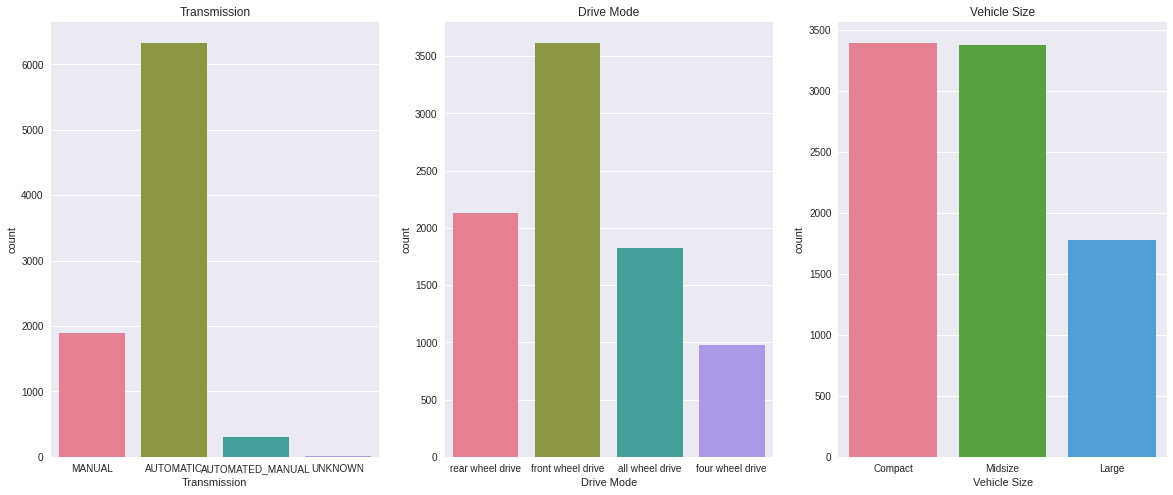

In [227]:
plt.figure(figsize=(20,8))


#Checking which kind of transmission is more in demand.
plt.subplot(1,3,1)
plt.title("Transmission")
sns.countplot(x="Transmission", data=data, palette='husl')

plt.subplot(1,3,2)
plt.title("Drive Mode")
sns.countplot(x="Drive Mode", data=data, palette='husl')

plt.subplot(1,3,3)
plt.title("Vehicle Size")
sns.countplot(x="Vehicle Size", data=data, palette='husl')
plt.show()

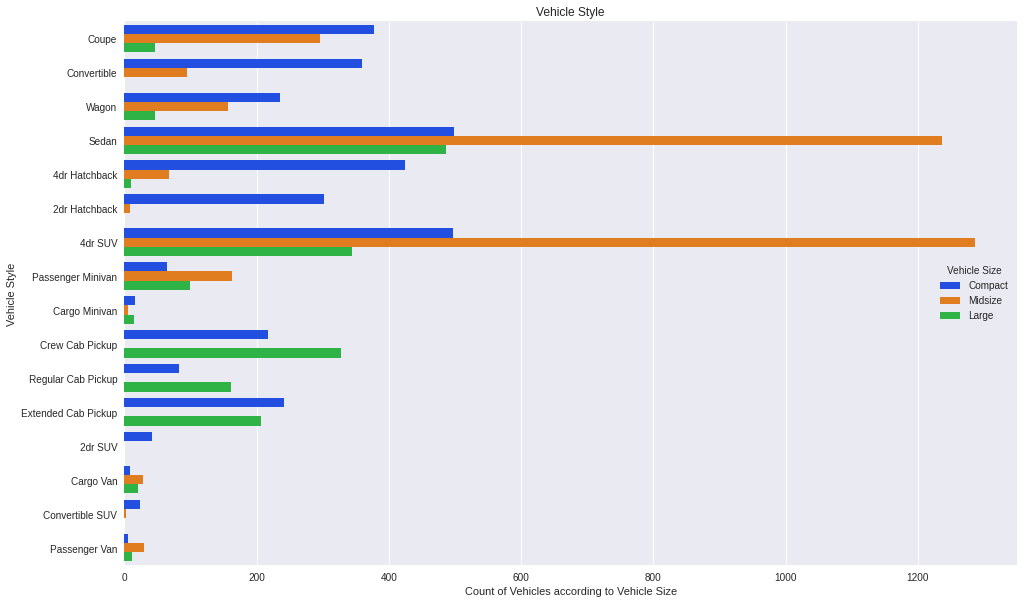

In [228]:
plt.figure(figsize=(16,10))
plt.title("Vehicle Style")
sns.countplot(y="Vehicle Style", data=data ,hue='Vehicle Size', palette='bright')
plt.xlabel('Count of Vehicles according to Vehicle Size')
plt.ylabel('Vehicle Style')
plt.show()

**Insights:**

1.Transmission type: "Automatic", is highest in selling, followed by "Manual".

2.Drive mode: "front wheel drive" is the highest selling. The others are at almost the same selling level.

3.Vehicle size: "Compact" and "Midsize" are more sold as compared to "Large" 

4."Sedan- Midsize" and "4dr SUV-Midsize" are the highest selling cars.

5."CargoMinivan", "Cargo Van", "Convertible SUV" and "MiniVan" are the lowest selling cars.

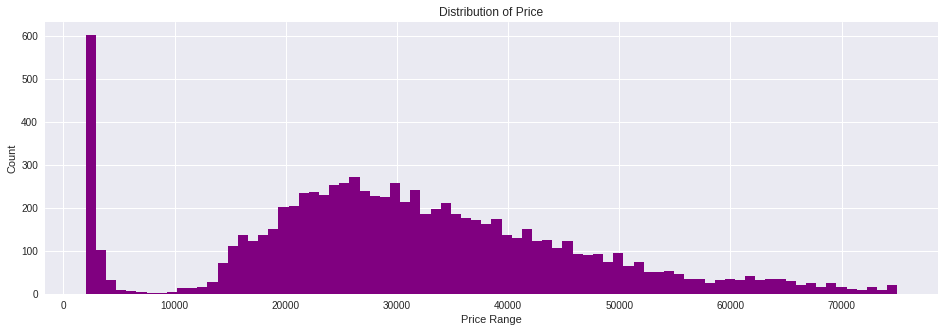

In [229]:
#This is how precisely the Price of cars is distributed, since it could be observed through boxplot properly.
plt.figure(figsize=(16,5))
data["Price"].plot.hist(bins=80, color='purple')
plt.title("Distribution of Price")
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

Most number of cars were sold with price range between 2000-3000 range.

In [230]:
#Having a look at the dataset
data.head(3)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350


# 9.Splitting the dataset into 80 and 20 ratio and building a machine learning model with price as the target variable

Separating X(Predictor Variables) and Y(Prediction Variable) from the dataset.

In [231]:
#Splitting dataset into X and Y values.
X = data[['Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C','Popularity']].values
y = data['Price'].values

Feature Scaling or Standardization: It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.
Some common methods to perform Feature Scaling are:
1. Min-Max Scaler

2. Standard Scaler

3. Robust Scaler

We will be using Standard scaling technique:

In [232]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaleX = StandardScaler()
scaleY = StandardScaler()

X = scaleX.fit_transform(X)
y = scaleY.fit_transform(y.reshape(-1,1))

Splitting the X and Y values into training and testing values.
Usually we keep the test size around 20-30 percent of the dataset. The train set is used to train the machine on the respective algorithm, while the test set is used to predict the values.

In [233]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 10.Trying different algorithms and checking their performance over metrics. 

The algorithms i will be using to predict the Price are:

1. Linear Regression

2. Polynomial Regression

3. Decision Tree Regressor

4. Support Vector Regressor

5. Random Forest Regressor

## 10.1 Linear Regression Model

In [234]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

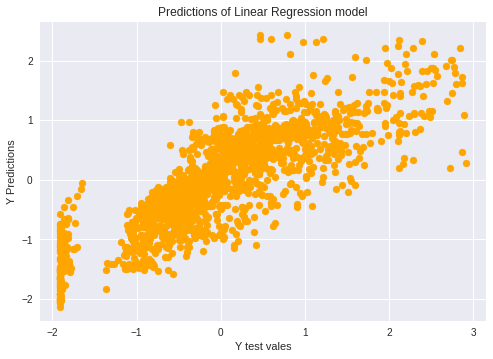

In [235]:
# Predicting the Test set results
y_pred = model.predict(X_test)
plt.title("Predictions of Linear Regression model")
plt.xlabel("Y test vales")
plt.ylabel("Y Predictions")
plt.scatter(y_test,y_pred, color='orange')
plt.show()

In [236]:
#Evaluating the model using the following metrics.
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161141


## 10.2 Polynomial Regression Model

In [237]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
model = PolynomialFeatures(degree = 4)
XP = model.fit_transform(X_train)
model.fit(XP, y_train)
reg = LinearRegression()
reg.fit(XP, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

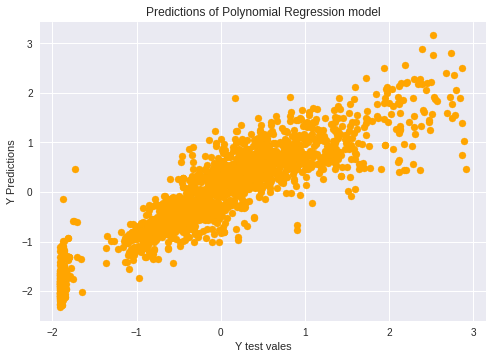

In [238]:
# Predicting a new result with Polynomial Regression
y_pred=reg.predict(model.fit_transform(X_test))
plt.title("Predictions of Polynomial Regression model")
plt.xlabel("Y test vales")
plt.ylabel("Y Predictions")
plt.scatter(y_test,y_pred, color='orange')
plt.show()

In [239]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31573061752351045
Root Mean Squared Error: 0.4351456478672663
R2 Score: 0.8053160242314691


## 10.3 Decision Tree Regressor

In [240]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

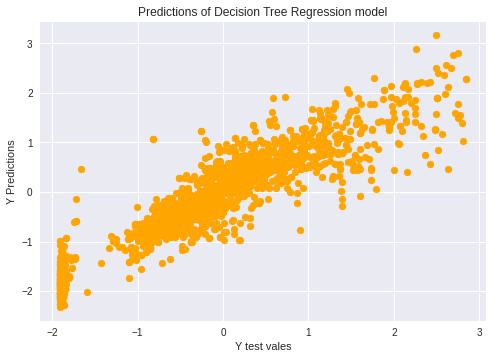

In [241]:
y_test=model.predict(X_test)
plt.title("Predictions of Decision Tree Regression model")
plt.xlabel("Y test vales")
plt.ylabel("Y Predictions")
plt.scatter(y_test,y_pred, color='orange')
plt.show()

In [242]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.2999248674157631
Root Mean Squared Error: 0.41790041179243287
R2 Score: 0.8180702633195901


## 10.4 Support Vector Regressor

In [243]:
#Using SVR model to fit our dataset
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

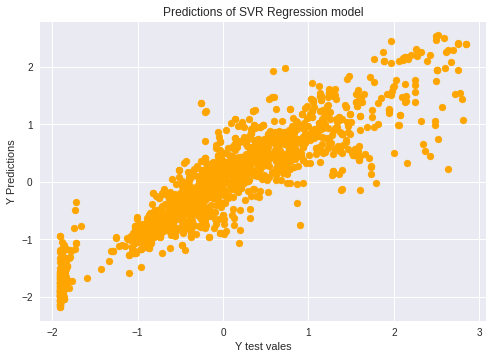

In [244]:
# Predicting a new result
y_pred = model.predict(X_test)
plt.title("Predictions of SVR Regression model")
plt.xlabel("Y test vales")
plt.ylabel("Y Predictions")
plt.scatter(y_test,y_pred, color='orange')
plt.show()

In [245]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.27800266167733517
Root Mean Squared Error: 0.40245568239808194
R2 Score: 0.8312692565133508


## 10.5 Random Forest Regressor

In [246]:
#Random Forest Regressior for the dataset
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 200, random_state = 0)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

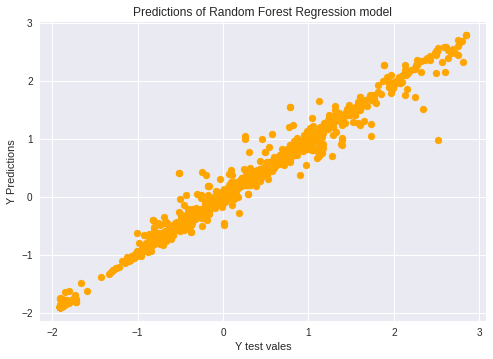

In [247]:
y_pred = model.predict(X_test)
plt.title("Predictions of Random Forest Regression model")
plt.xlabel("Y test vales")
plt.ylabel("Y Predictions")
plt.scatter(y_test,y_pred, color='orange')
plt.show()

In [248]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.05091274679189455
Root Mean Squared Error: 0.11675724736157526
R2 Score: 0.9857987756643317
